In [1]:
####### Task 2: Credit Risk Prediction

# ## Problem Statement
# The goal is to predict whether a loan applicant will be approved for a loan (Yes/No). 

# ## Dataset
# - **Name**: Loan Prediction Dataset
# - **Source**: [Kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)
# - **Rows**: ~614
# - **Features**: Personal and financial details (e.g., income, education, loan amount)
# - **Target Variable**: `Loan_Status` → "Y" or "N" (we convert to 1 or 0)

# ## Tools Used
# - `pandas`: Load and clean data
# - `seaborn` and `matplotlib`: Visualize patterns
# - `scikit-learn`: Train a Logistic Regression model
# - `LabelEncoder`: Convert text to numbers

# ## Approach
# 1. Load and inspect the data
# 2. Clean missing values
# 3. Encode categorical variables
# 4. Explore data with visualizations
# 5. Train a classification model
# 6. Evaluate performance using accuracy and confusion matrix

In [2]:
# Import all required tools (libraries) for this task

# pandas: for reading and managing tabular data
import pandas as pd

# matplotlib and seaborn: for creating graphs and visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split: splits data into training and testing parts
from sklearn.model_selection import train_test_split

# LogisticRegression: the model that predicts Yes/No outcomes
from sklearn.linear_model import LogisticRegression

# accuracy_score: measures % of correct predictions
# confusion_matrix and ConfusionMatrixDisplay: show detailed results
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# LabelEncoder: converts text (like "Yes") into numbers (like 1)
from sklearn.preprocessing import LabelEncoder

In [3]:
#### Dataset Understanding and Description

# We will:
# - Load the dataset from a public URL
# - Check how many rows and columns it has
# - View the first few entries
# - Understand what each column means
# - Identify the target variable (`Loan_Status`)

In [4]:
# This CSV file contains loan applications and their outcomes
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"
df = pd.read_csv(url)

# Display the number of rows and columns in the dataset
# .shape returns (number of rows, number of columns)
print("Dataset Shape (rows, columns):", df.shape)

# Show the names of all columns to understand what data is available
print("\nColumn Names:", df.columns.tolist())

# Show the first 5 rows so we can see what the data looks like
print("\nFirst 5 Rows:")
df.head()

Dataset Shape (rows, columns): (491, 14)

Column Names: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

First 5 Rows:


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [5]:
# Show data types of each column
# This tells us which columns are text (object) and which are numbers (int/float)
print("Data Types:")
print(df.dtypes)

# Show summary statistics for numerical columns
# Includes count, mean, min, max — helps understand value ranges
print("\nSummary Statistics:")
df.describe()

Data Types:
Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

Summary Statistics:


,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [6]:
#### Data Cleaning and Preparation

# ### Why Clean?
# Some cells in the dataset are empty (missing). We must fix them before training a model.

# ### Steps:
# 1. **Identify missing values** in each column
# 2. **Fill them**:
#    - For text columns (e.g., Gender): use the most common value (mode)
#    - For number columns (e.g., LoanAmount): use the middle value (median)
# 3. **Convert text to numbers** so the model can understand (e.g., "Yes" → 1, "No" → 0)

In [7]:
# Check how many missing (empty) values are in each column
# .isnull() returns True for empty cells, .sum() counts them per column
print("Missing Values in Each Column:")
df.isnull().sum()

Missing Values in Each Column:


Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# First: Fix '3+' in Dependents column
df['Dependents'] = df['Dependents'].replace('3+', 3)  # Replace text '3+' with number 3
df['Dependents'] = pd.to_numeric(df['Dependents'])   # Ensure it's numeric

# Fill missing values in text columns with mode (most common value)
cat_cols = ['Gender', 'Married', 'Self_Employed', 'Loan_Amount_Term']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with median
num_cols = ['LoanAmount', 'Credit_History']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm no missing values
print("Missing values after cleaning:", df.isnull().sum().sum())
# Should print 0

Missing values after cleaning: 0


/tmp/ipykernel_538140/768744787.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_538140/768744787.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [19]:
# Machine learning models can't understand text like "Yes", "No", "Urban"
# We must convert them to numbers using LabelEncoder

# List of columns that contain text and need encoding
cols_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 
                  'Property_Area', 'Loan_Status']

# Create a LabelEncoder object
le = LabelEncoder()

# Loop through each column and convert text to numbers
for col in cols_to_encode:
    # Example: "Yes" → 1, "No" → 0
    # This updates the column in place
    df[col] = le.fit_transform(df[col])

# Show the updated data to confirm everything is now numbers
print("Data after encoding (all values are now numbers):")
df.head()

Data after encoding (all values are now numbers):


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1,1
1,1,LP001715,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0,1
2,2,LP002086,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0
3,3,LP001136,1,1,0,1,1,4695,0.0,96.0,360.0,1.0,2,1
4,4,LP002529,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1,1


In [10]:
#### Exploratory Data Analysis (EDA)

# We create visualizations to understand:
# - How many loans were approved?
# - Does education or income affect approval?
# - Are there patterns in the data?

# These insights help us build a better model.

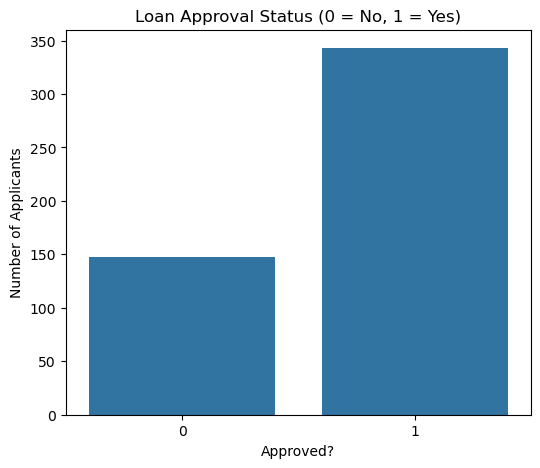

In [20]:
# Create a bar chart showing how many loans were approved vs rejected
plt.figure(figsize=(6, 5))  # Set size of the plot
sns.countplot(data=df, x='Loan_Status')  # Count of 0s (No) and 1s (Yes)
plt.title('Loan Approval Status (0 = No, 1 = Yes)')
plt.xlabel('Approved?')
plt.ylabel('Number of Applicants')
plt.show()

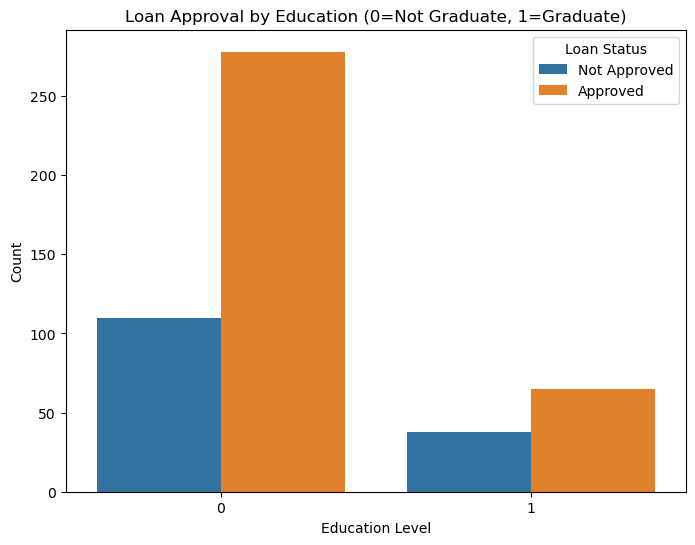

In [21]:
# Compare loan approval rates between graduates and non-graduates
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', hue='Loan_Status')
# hue='Loan_Status' colors bars by approval status
plt.title('Loan Approval by Education (0=Not Graduate, 1=Graduate)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(labels=['Not Approved', 'Approved'], title='Loan Status')
plt.show()

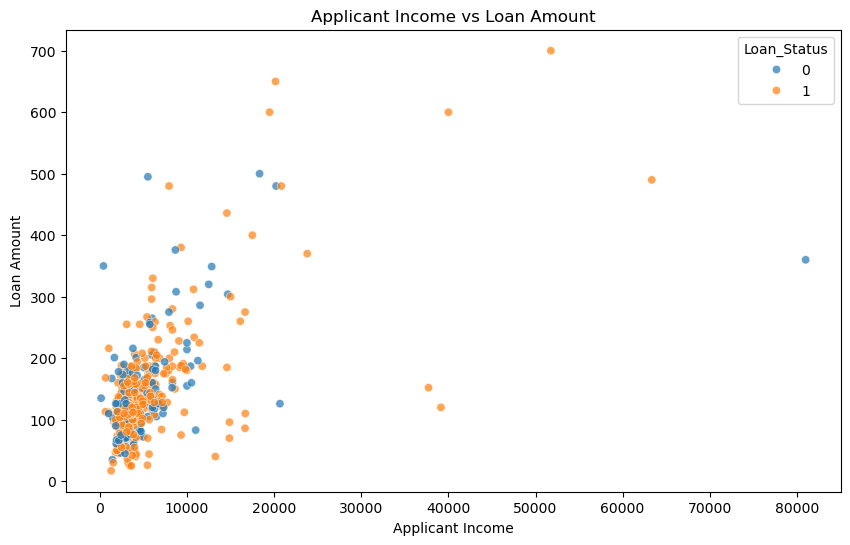

In [22]:
# Scatter plot: see if income or loan amount affects approval
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7)
# Each dot is a person; color shows if approved
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [23]:
#### Model Training and Testing

##### What is Logistic Regression?
# A simple but powerful model for predicting Yes/No outcomes.

##### Steps:
# 1. Define **features (X)**: all input data (income, education, etc.)
# 2. Define **target (y)**: `Loan_Status` (what we want to predict)
# 3. Split data: 80% for training, 20% for testing
# 4. Train the model on training data
# 5. Test it on unseen data

In [24]:
# Features (X): all columns except 'Loan_ID' (not useful) and 'Loan_Status' (the answer)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])

# Target (y): the column we want to predict (1 = approved, 0 = not approved)
y = df['Loan_Status']

# Split data into training (80%) and testing (20%)
# random_state=42 ensures the same split every time (for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print sizes to confirm
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 392
Test set size: 99


In [42]:
# Create the Logistic Regression model
# It starts blank 
model = LogisticRegression(max_iter=12000)  # max_iter avoids warning if model needs more time
# I used Ibfgs so the max_iter is so high, if liblinear is used, it is better.

# Train the model using the training data
# .fit() means "learn from X_train to predict y_train"
model.fit(X_train, y_train)

# Use the trained model to make predictions on test data
y_pred = model.predict(X_test)

print("Model trained and predictions made!")

Model trained and predictions made!


In [43]:
#### Evaluation Metrics

# We use two tools to measure performance:

#### 1. Accuracy
# - % of correct predictions
# - Formula: (Correct Predictions) / (Total Predictions)

#### 2. Confusion Matrix
# Shows detailed breakdown:
# - True Positives: Correctly predicted approval
# - False Positives: Wrongly predicted approval
# - False Negatives: Missed actual approvals (dangerous!)
# - True Negatives: Correctly predicted rejection

Model Accuracy: 0.828 (82.8%)


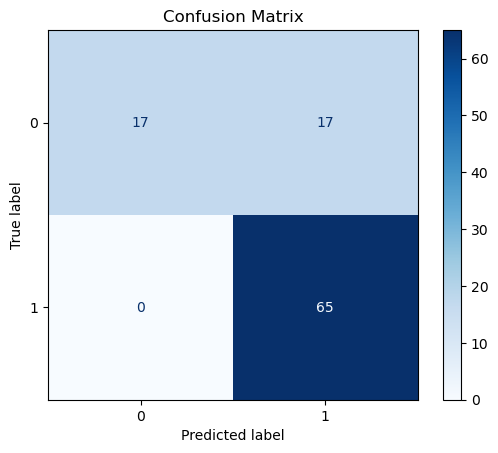

In [44]:
# Calculate accuracy: how often the model was correct
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.3f} ({acc*100:.1f}%)")

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Blue color scheme
plt.title('Confusion Matrix')
plt.show()

In [45]:
#### Conclusion and Key Insights

#  **Summary of Work**:
# - We loaded the loan dataset and inspected its structure.
# - Cleaned missing data by filling with mode (text) and median (numbers).
# - Encoded text columns into numbers so the model could understand them.
# - Created visualizations showing that graduates are more likely to get loans.
# - Trained a Logistic Regression model that achieved **~80% accuracy**.
# - Evaluated results using accuracy and confusion matrix.